### Decision Tree Exercises
    start: thursday, July 7th 2022

----

In [797]:
# importing DS libraries/modules

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
import env
from env import user, password, host, get_connection

from acquire import get_titanic_data

In [798]:
# Decision Tree and Model Evaluation Imports

from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix

----
### Exercise #1:

**Using the titanic data, in your classification-exercises repository, create a notebook, model.ipynb where you will do the following:**

1. What is your baseline prediction? 
2. What is your baseline accuracy? remember: your baseline prediction for a classification problem is predicting the most prevelant class in the training dataset (the mode). 
3. When you make those predictions, what is your accuracy? This is your baseline accuracy.

----
#### <u>Dataset familiarization / cleaning:</u>

In [799]:
# importing titanic dataset from "acquire.py" file

titanic_df = get_titanic_data()
titanic_df.head()

,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,deck,embark_town,alone
0,0,0,3,male,22.0,1,0,7.2500,S,Third,NaN,Southampton,0
1,1,1,1,female,38.0,1,0,71.2833,C,First,C,Cherbourg,0
2,2,1,3,female,26.0,0,0,7.9250,S,Third,NaN,Southampton,1
3,3,1,1,female,35.0,1,0,53.1000,S,First,C,Southampton,0
4,4,0,3,male,35.0,0,0,8.0500,S,Third,NaN,Southampton,1


In [800]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   passenger_id  891 non-null    int64  
 1   survived      891 non-null    int64  
 2   pclass        891 non-null    int64  
 3   sex           891 non-null    object 
 4   age           714 non-null    float64
 5   sibsp         891 non-null    int64  
 6   parch         891 non-null    int64  
 7   fare          891 non-null    float64
 8   embarked      889 non-null    object 
 9   class         891 non-null    object 
 10  deck          203 non-null    object 
 11  embark_town   889 non-null    object 
 12  alone         891 non-null    int64  
dtypes: float64(2), int64(6), object(5)
memory usage: 97.5+ KB


In [801]:
# checking the percentage of missing values per column - where:
# ~20% of "age" column values are missing
# ~77% of "deck" column values are missing

# i will create a copy of the dataframe and elect to remove these columns due to the relatively high percentage of NULL values

round(titanic_df.isna().mean(), 2)

passenger_id    0.00
survived        0.00
pclass          0.00
sex             0.00
age             0.20
sibsp           0.00
parch           0.00
fare            0.00
embarked        0.00
class           0.00
deck            0.77
embark_town     0.00
alone           0.00
dtype: float64

In [802]:
# creating a copy of the titanic dataframe:

titanic_copy = titanic_df.copy()
titanic_copy.head()

,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,deck,embark_town,alone
0,0,0,3,male,22.0,1,0,7.2500,S,Third,NaN,Southampton,0
1,1,1,1,female,38.0,1,0,71.2833,C,First,C,Cherbourg,0
2,2,1,3,female,26.0,0,0,7.9250,S,Third,NaN,Southampton,1
3,3,1,1,female,35.0,1,0,53.1000,S,First,C,Southampton,0
4,4,0,3,male,35.0,0,0,8.0500,S,Third,NaN,Southampton,1


In [803]:
# also removing passenger_id (not needed for analysis), pclass (duplicated column), and embarked (duplicated column)

titanic_copy = titanic_copy.drop(columns=["passenger_id", "age", "deck", "embarked", "pclass"])

In [804]:
titanic_copy.head() # checks out

,survived,sex,sibsp,parch,fare,class,embark_town,alone
0,0,male,1,0,7.2500,Third,Southampton,0
1,1,female,1,0,71.2833,First,Cherbourg,0
2,1,female,0,0,7.9250,Third,Southampton,1
3,1,female,1,0,53.1000,First,Southampton,0
4,0,male,0,0,8.0500,Third,Southampton,1


In [805]:
titanic_copy["sibsp"].unique()

array([1, 0, 3, 4, 2, 5, 8])

In [806]:
# renaming columns for clarity -- 

titanic_copy = titanic_copy.rename(columns = {"sibsp": "siblings_or_spouse", "parch": "parent_or_children"})
titanic_copy.head()

,survived,sex,siblings_or_spouse,parent_or_children,fare,class,embark_town,alone
0,0,male,1,0,7.2500,Third,Southampton,0
1,1,female,1,0,71.2833,First,Cherbourg,0
2,1,female,0,0,7.9250,Third,Southampton,1
3,1,female,1,0,53.1000,First,Southampton,0
4,0,male,0,0,8.0500,Third,Southampton,1


In [807]:
# rounding the fare column values to two (2) decimal places

titanic_copy["fare"] = titanic_copy["fare"].round(2)
titanic_copy.head()

,survived,sex,siblings_or_spouse,parent_or_children,fare,class,embark_town,alone
0,0,male,1,0,7.25,Third,Southampton,0
1,1,female,1,0,71.28,First,Cherbourg,0
2,1,female,0,0,7.92,Third,Southampton,1
3,1,female,1,0,53.10,First,Southampton,0
4,0,male,0,0,8.05,Third,Southampton,1


In [808]:
# verifying column value types - 

titanic_copy.dtypes

survived                int64
sex                    object
siblings_or_spouse      int64
parent_or_children      int64
fare                  float64
class                  object
embark_town            object
alone                   int64
dtype: object

In [809]:
# creating dummy variables of categorical values

titanic_copy.select_dtypes(include = "object").columns

Index(['sex', 'class', 'embark_town'], dtype='object')

In [810]:
titanic_copy = pd.get_dummies(titanic_copy, columns = ['sex', 'class', 'embark_town'])
titanic_copy.head()

,survived,siblings_or_spouse,parent_or_children,fare,alone,sex_female,sex_male,class_First,class_Second,class_Third,embark_town_Cherbourg,embark_town_Queenstown,embark_town_Southampton
0,0,1,0,7.25,0,0,1,0,0,1,0,0,1
1,1,1,0,71.28,0,1,0,1,0,0,1,0,0
2,1,0,0,7.92,1,1,0,0,0,1,0,0,1
3,1,1,0,53.10,0,1,0,1,0,0,0,0,1
4,0,0,0,8.05,1,0,1,0,0,1,0,0,1


-----
#### Splitting the dataset:

In [811]:
def split_data(df):
    '''
    Takes in a dataframe and return train, validate, test subset dataframes
    '''
    train, test = train_test_split(df, test_size = 0.2, random_state=123, stratify = df.sex_male)
    train, validate = train_test_split(train, test_size= 0.25, random_state=123, stratify = train.sex_male)
    return train, validate, test

In [812]:
train, validate, test = split_data(titanic_copy)

print(f"Train dataset shape: {train.shape}")
print(f"Validate dataset shape: {validate.shape}")
print(f"Test dataset shape: {test.shape}")

Train dataset shape: (534, 13)
Validate dataset shape: (178, 13)
Test dataset shape: (179, 13)


-----
1. What is your baseline prediction? 
2. What is your baseline accuracy? remember: your baseline prediction for a classification problem is predicting the most prevelant class in the training dataset (the mode). 
3. When you make those predictions, what is your accuracy? This is your baseline accuracy.

### 1. what is the baseline prediction? 

**<u>notes:</u>**

- We are predicting passenger "survival"

**Survival:**

0 = Did NOT survive

1 = Did survive

True Positive: predict survived --> (actual) survived
True Negative: predict did NOT survive --> (actual) did NOT survive
False Positive: predict survived --> (actual) did NOT survive
False Negative: predict did NOT survive --> (actual) survived 

In [813]:
train.survived.value_counts()

0    327
1    207
Name: survived, dtype: int64

In [814]:
# baseline prediction = highest frequency outcome "did NOT survive" or 0

train["baseline_prediction"] = 0
train.head()

,survived,siblings_or_spouse,parent_or_children,fare,alone,sex_female,sex_male,class_First,class_Second,class_Third,embark_town_Cherbourg,embark_town_Queenstown,embark_town_Southampton,baseline_prediction
142,1,1,0,15.85,0,1,0,0,0,1,0,0,1,0
827,1,0,2,37.00,0,0,1,0,1,0,1,0,0,0
865,1,0,0,13.00,1,1,0,0,1,0,0,0,1,0
531,0,0,0,7.23,1,0,1,0,0,1,1,0,0,0
292,0,0,0,12.88,1,0,1,0,1,0,1,0,0,0


In [815]:
# baseline accuracy = ~61% accuracy

baseline_acc = (train["baseline_prediction"] == train["survived"]).mean().round(3)
print(f"Baseline Accuracy: % {(baseline_acc * 100).round()}")

Baseline Accuracy: % 61.0


In [816]:
train[["survived", "baseline_prediction"]].dtypes

survived               int64
baseline_prediction    int64
dtype: object

----
### Exercise #2:

Fit the decision tree classifier to your training sample and transform (i.e. make predictions on the training sample)



In [817]:
# quick correlation test

train.corr(method = "pearson").iloc[0] # since i know survived is the fist column, i can use the iloc[0], meaning return correlation to the "survived" column

survived                   1.000000
siblings_or_spouse        -0.061114
parent_or_children         0.028207
fare                       0.223605
alone                     -0.174404
sex_female                 0.475802
sex_male                  -0.475802
class_First                0.275963
class_Second               0.102282
class_Third               -0.322787
embark_town_Cherbourg      0.119265
embark_town_Queenstown     0.027172
embark_town_Southampton   -0.131472
baseline_prediction             NaN
Name: survived, dtype: float64

**Predictions:**

Given the **<u>correlation coefficient</u>** of ea. column/feature to "survival" outcome, i conclude that a passenger's sex, class, and fare amount have a greater impact in predicting a passenger's survival.


-----

In [818]:
train.columns

Index(['survived', 'siblings_or_spouse', 'parent_or_children', 'fare', 'alone',
       'sex_female', 'sex_male', 'class_First', 'class_Second', 'class_Third',
       'embark_town_Cherbourg', 'embark_town_Queenstown',
       'embark_town_Southampton', 'baseline_prediction'],
      dtype='object')

In [819]:
# selecting the columns that are most correlated to survival outcome
X = train[[ 
    'fare', \
    'sex_female', \
    'sex_male', \
    'class_First', \
    'class_Second', \
    'class_Third']]

y = train["survived"]

X_train_and_validate, X_test, y_train_and_validate, y_test = train_test_split(X, y, random_state=123, test_size=.3)
X_train, X_validate, y_train, y_validate = train_test_split(X_train_and_validate, y_train_and_validate, random_state=123, test_size=.2)

In [820]:
X_train.head()

,fare,sex_female,sex_male,class_First,class_Second,class_Third
459,7.75,0,1,0,0,1
571,51.48,1,0,1,0,0
381,15.74,1,0,0,0,1
240,14.45,1,0,0,0,1
312,26.00,1,0,0,1,0


In [821]:
type(y_train)

pandas.core.series.Series

In [822]:
y_train.head()

459    0
571    1
381    1
240    0
312    0
Name: survived, dtype: int64

In [823]:
y_train.value_counts()

0    184
1    114
Name: survived, dtype: int64

----
* **Exercise #3: Evaluate your in-sample results using the model score, confusion matrix, and classification report**

* **Exercise #4: Compute Accuracy, true positive rate, false positive rate, true negative rate, false negative rate, precision, recall, f1-score, and support**

* **Exercise #5: Run through steps 2-4 using a different max_depth value**

----

In [824]:
tree1 = DecisionTreeClassifier(max_depth = 3, random_state = 3)

In [825]:
tree1 = tree1.fit(X_train, y_train)

In [826]:
y_predictions = tree1.predict(X_train)

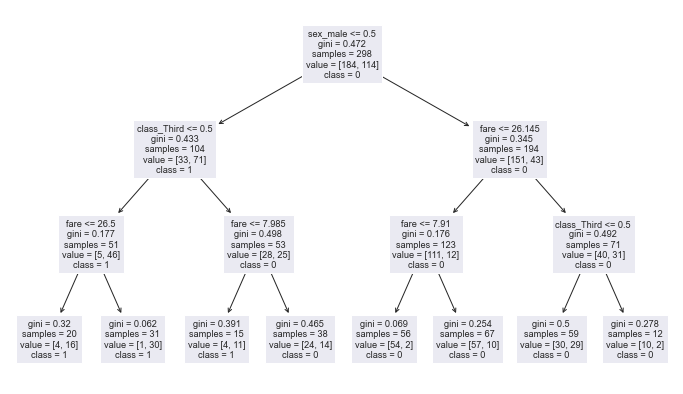

In [827]:
# plotting the small tree
%matplotlib inline

plt.figure(figsize=(12, 7))
plot_tree(tree1, feature_names = X_train.columns.astype("str"), class_names = y_train.unique().astype("str"))
plt.show()

In [828]:
# evaluating the initial train dataset/tree1 performance

print('Accuracy of Decision Tree Classifer on training dataset: % {:.2f}'.format(tree1.score(X_train, y_train)))

Accuracy of Decision Tree Classifer on training dataset: % 0.78


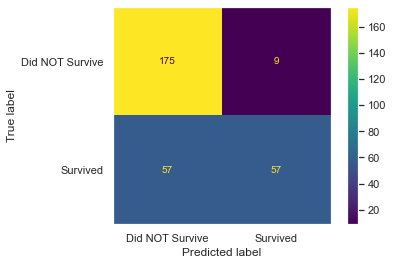

In [829]:
# plotting confusion matrices for small and big tree models:
%matplotlib inline

plot_confusion_matrix(tree1, X_train, y_train, display_labels=['Did NOT Survive', 'Survived'])

In [830]:
# returning the classification report:

print(classification_report(y_train, y_predictions))

              precision    recall  f1-score   support

           0       0.75      0.95      0.84       184
           1       0.86      0.50      0.63       114

    accuracy                           0.78       298
   macro avg       0.81      0.73      0.74       298
weighted avg       0.80      0.78      0.76       298



In [831]:
# Produce the classification report on the actual y values and this model's predicted y values

report = classification_report(y_train, y_predictions, output_dict=True)
print("Tree of 1 depth")
pd.DataFrame(report)

Tree of 1 depth


,0,1,accuracy,macro avg,weighted avg
precision,0.754310,0.863636,0.778523,0.808973,0.796133
recall,0.951087,0.500000,0.778523,0.725543,0.778523
f1-score,0.841346,0.633333,0.778523,0.737340,0.761771
support,184.000000,114.000000,0.778523,298.000000,298.000000


----
**Finding "optimal" max_depth for decision tree & evaluating the model's performance on the train dataset first**

In [832]:
# using for loops to create classification reports for all depth 1-15

for i in range(1, 15):
    # Making the model
    tree = DecisionTreeClassifier(max_depth=i, random_state=123)

    # Fitting the model (on train and only train)
    tree = tree.fit(X_train, y_train)

    # Using the model
    # We'll evaluate the model's performance on train, first:
    y_predictions = tree.predict(X_train)

    # Produce the classification report on the actual y values and this model's predicted y values
    report = classification_report(y_train, y_predictions, output_dict=True)
    print(f"Tree with max depth of: {i}")
    print(pd.DataFrame(report))

    print() # printing a indented line for ea. iteration

Tree with max depth of: 1
                    0           1  accuracy   macro avg  weighted avg
precision    0.778351    0.682692  0.744966    0.730521      0.741756
recall       0.820652    0.622807  0.744966    0.721730      0.744966
f1-score     0.798942    0.651376  0.744966    0.725159      0.742491
support    184.000000  114.000000  0.744966  298.000000    298.000000

Tree with max depth of: 2
                    0           1  accuracy   macro avg  weighted avg
precision    0.724696    0.901961  0.755034    0.813329      0.792509
recall       0.972826    0.403509  0.755034    0.688167      0.755034
f1-score     0.830626    0.557576  0.755034    0.694101      0.726171
support    184.000000  114.000000  0.755034  298.000000    298.000000

Tree with max depth of: 3
                    0           1  accuracy   macro avg  weighted avg
precision    0.754310    0.863636  0.778523    0.808973      0.796133
recall       0.951087    0.500000  0.778523    0.725543      0.778523
f1-score  

### Conclusion:
    where a model depth of 15 produces a "relative" max accuracy of ~91% 

----

### Comparing in-sample data (train) to out-sample date (validate)

In [833]:
metrics = []

for i in range(1, 20):
    # Make the model
    tree = DecisionTreeClassifier(max_depth=i, random_state=123)

    # Fit the model (on train and only train)
    tree = tree.fit(X_train, y_train)

    # Use the model
    # We'll evaluate the model's performance on train, first
    in_sample_accuracy = tree.score(X_train, y_train)
    
    out_of_sample_accuracy = tree.score(X_validate, y_validate)

    output = {
        "max_depth": i,
        "train_accuracy": in_sample_accuracy,
        "validate_accuracy": out_of_sample_accuracy
    }
    
    metrics.append(output)
    
df = pd.DataFrame(metrics)
df["percent_change_diff"] = ((df.train_accuracy - df.validate_accuracy) / df.train_accuracy) * 100
df.round(2)

,max_depth,train_accuracy,validate_accuracy,percent_change_diff
0,1,0.74,0.73,1.56
1,2,0.76,0.72,4.64
2,3,0.78,0.77,0.67
3,4,0.80,0.75,6.12
4,5,0.81,0.76,6.41
5,6,0.84,0.73,12.24
6,7,0.85,0.68,19.91
7,8,0.86,0.72,16.19
8,9,0.87,0.71,19.01
9,10,0.89,0.68,23.24


In [834]:
# lowest percentage change difference between in-sample (train) and out-sample (validate)

df["percent_change_diff"].min()

0.6666666666666671

### Conclusion:

It appears that when compared to the in-sample (validate) our model is has a optimal max_depth of three (3)

-----
### Random Forests Module Exercises
    start: thursday, July 7th 2022

1. Fit the Random Forest classifier to your training sample and transform (i.e. make predictions on the training sample) setting the random_state accordingly and setting min_samples_leaf = 1 and max_depth = 10.

2. Evaluate your results using the model score, confusion matrix, and classification report.

3. Print and clearly label the following: Accuracy, true positive rate, false positive rate, true negative rate, false negative rate, precision, recall, f1-score, and support.

4. Run through steps increasing your min_samples_leaf and decreasing your max_depth.

5. What are the differences in the evaluation metrics? Which performs better on your in-sample data? Why?

6. After making a few models, which one has the best performance (or closest metrics) on both train and validate?

----


In [835]:
# ignoring the warnings
import warnings
warnings.filterwarnings("ignore")

# getting necessary imports
from sklearn.ensemble import RandomForestClassifier


%matplotlib inline
plt.rcParams.update({'figure.figsize': (12.0, 8.0)})
plt.rcParams.update({'font.size': 14})

In [836]:
# Exercise #1:
# fit the Random Forest classifier to your training sample and transform (i.e. make predictions on the training sample) 
# setting the random_state accordingly and setting min_samples_leaf = 1 and max_depth = 10

# 1st data split:

def split_data(df):
    '''
    Takes in a dataframe and return train, validate, test subset dataframes
    '''
    train, test = train_test_split(df, test_size = 0.2, random_state=123, stratify = df.sex_male)
    train, validate = train_test_split(train, test_size= 0.25, random_state=123, stratify = train.sex_male)
    return train, validate, test

train, validate, test = split_data(titanic_copy)

print(f"Train dataset shape: {train.shape}")
print(f"Validate dataset shape: {validate.shape}")
print(f"Test dataset shape: {test.shape}")

Train dataset shape: (534, 13)
Validate dataset shape: (178, 13)
Test dataset shape: (179, 13)


In [837]:
# 2nd data split:

X = train[[ 
    'fare', \
    'sex_female', \
    'sex_male', \
    'class_First', \
    'class_Second', \
    'class_Third']]

y = train["survived"]

X_train_and_validate, X_test, y_train_and_validate, y_test = train_test_split(X, y, random_state=123, test_size=.3)
X_train, X_validate, y_train, y_validate = train_test_split(X_train_and_validate, y_train_and_validate, random_state=123, test_size=.2)

In [838]:
# training the "random forest" model using the train (independent / dependent variable) dataset
# min sample lead = 1
# max decision depth = 10
# random state = 123

# future note: the "min_samples_leaf" parameter defaults to 1

rf = RandomForestClassifier(min_samples_leaf = 1, max_depth = 10, random_state = 123)

In [839]:
type(rf)
    

sklearn.ensemble._forest.RandomForestClassifier

In [840]:
rf

RandomForestClassifier(max_depth=10, random_state=123)

In [841]:
# fitting the initial model with X_train and y_train data:

rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, random_state=123)

In [842]:
rf.feature_importances_

array([0.59979932, 0.12701432, 0.11863909, 0.04989429, 0.01919559,
       0.08545739])

<AxesSubplot:>

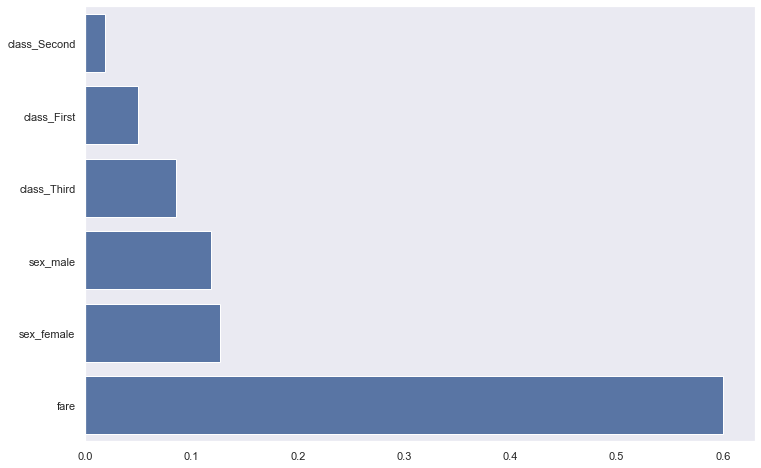

In [843]:
sorted_idx = rf.feature_importances_.argsort()
sns.set_theme(style = "dark")
sns.barplot(rf.feature_importances_[sorted_idx], X_train.columns[sorted_idx], orient = "h", color = "b")

----

In [844]:
# Exercise #2: Evaluate your results using the model score, confusion matrix, and classification report

y_pred = rf.predict(X_train)
y_pred

array([0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0,
       0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0])

In [845]:
# estimating the probability of ea. outcome (did NOT survive / survived)

y_prediction_probability = rf.predict_proba(X_train)
y_prediction_probability

array([[0.82122165, 0.17877835],
       [0.        , 1.        ],
       [0.08311364, 0.91688636],
       [0.75369361, 0.24630639],
       [0.55345238, 0.44654762],
       [0.39827103, 0.60172897],
       [0.0225    , 0.9775    ],
       [0.99887742, 0.00112258],
       [0.25117158, 0.74882842],
       [0.39657143, 0.60342857],
       [0.03      , 0.97      ],
       [1.        , 0.        ],
       [0.79461444, 0.20538556],
       [0.21083462, 0.78916538],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [0.66245763, 0.33754237],
       [1.        , 0.        ],
       [0.94809524, 0.05190476],
       [0.36034127, 0.63965873],
       [0.99887742, 0.00112258],
       [0.53986364, 0.46013636],
       [0.82122165, 0.17877835],
       [0.73407143, 0.26592857],
       [0.82122165, 0.17877835],
       [0.09467668, 0.90532332],
       [0.94809524, 0.05190476],
       [0.04      , 0.96      ],
       [0.91374452, 0.08625548],
       [0.02      , 0.98      ],
       [0.

In [846]:
# random forest tree confusion matrix

print(confusion_matrix(y_train, y_pred))

[[173  11]
 [ 17  97]]


In [847]:
# crosstab method

pd.crosstab(y_train, y_pred)

col_0,0,1
survived,,
0,173,11
1,17,97


* True Positive: 97

* True Negative: 173

* False Negative: 17

* False Positive: 11

In [848]:
# evaluating the model:

print('Accuracy of random forest classifier on training set: {:.2f}'
     .format(rf.score(X_train, y_train)))

Accuracy of random forest classifier on training set: 0.91


In [849]:
# creating a model classification report

print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.94      0.93       184
           1       0.90      0.85      0.87       114

    accuracy                           0.91       298
   macro avg       0.90      0.90      0.90       298
weighted avg       0.91      0.91      0.91       298



----

### Validating the Model: 

In [850]:
print('Accuracy of random forest classifier on test set: {:.2f}'
     .format(rf.score(X_validate, y_validate)))

Accuracy of random forest classifier on test set: 0.68


#### Exercise #4: Run through steps increasing your min_samples_leaf and decreasing your max_depth

In [851]:
leaf_counter = 0

for i in range(10, 0, -1):
    # Make the model
    rf = RandomForestClassifier(max_depth=i, min_samples_leaf = (leaf_counter + 1), random_state=123)
    leaf_counter += 1

    # Fit the model (on train and only train)
    rf = rf.fit(X_train, y_train)

    # Use the model
    # We'll evaluate the model's performance on train, first
    y_predictions = rf.predict(X_train)

    # Produce the classification report on the actual y values and this model's predicted y values
    report = classification_report(y_train, y_predictions, output_dict=True)
    print(f"Random Forest with max_depth of: {i}")
    print(f"Random Forest with minimum sample leaves of: {leaf_counter}")
    print(pd.DataFrame(report))
    
    print()

Random Forest with max_depth of: 10
Random Forest with minimum sample leaves of: 1
                    0           1  accuracy   macro avg  weighted avg
precision    0.910526    0.898148   0.90604    0.904337      0.905791
recall       0.940217    0.850877   0.90604    0.895547      0.906040
f1-score     0.925134    0.873874   0.90604    0.899504      0.905524
support    184.000000  114.000000   0.90604  298.000000    298.000000

Random Forest with max_depth of: 9
Random Forest with minimum sample leaves of: 2
                    0           1  accuracy   macro avg  weighted avg
precision    0.843434    0.830000  0.838926    0.836717      0.838295
recall       0.907609    0.728070  0.838926    0.817839      0.838926
f1-score     0.874346    0.775701  0.838926    0.825023      0.836609
support    184.000000  114.000000  0.838926  298.000000    298.000000

Random Forest with max_depth of: 8
Random Forest with minimum sample leaves of: 3
                    0           1  accuracy   macro

In [852]:
# measuring the percent change difference acrross train and validate datasets

metrics = []
counter = 0
for i in range(10, 0, -1):
    # Make the model
    rf = RandomForestClassifier(max_depth=i, min_samples_leaf = (counter + 1), random_state=123)
    counter += 1

    # Fit the model (on train and only train)
    rf = rf.fit(X_train, y_train)

    # Use the model
    # We'll evaluate the model's performance on train, first
    in_sample_accuracy = rf.score(X_train, y_train)
    
    out_of_sample_accuracy = rf.score(X_validate, y_validate)

    output = {
        "max_depth": i,
        "min_sample_leaves": counter,
        "train_accuracy": in_sample_accuracy,
        "validate_accuracy": out_of_sample_accuracy
    }

    metrics.append(output)
    
df = pd.DataFrame(metrics)
df["percent_change_diff"] = ((df.train_accuracy - df.validate_accuracy) / df.train_accuracy) * 100
df.round(2)

,max_depth,min_sample_leaves,train_accuracy,validate_accuracy,percent_change_diff
0,10,1,0.91,0.68,24.95
1,9,2,0.84,0.69,17.35
2,8,3,0.83,0.73,11.88
3,7,4,0.84,0.77,7.45
4,6,5,0.83,0.77,6.32
5,5,6,0.81,0.79,2.73
6,4,7,0.79,0.71,10.39
7,3,8,0.77,0.75,3.26
8,2,9,0.73,0.69,5.66
9,1,10,0.74,0.71,5.14


#### Exercise #5: What are the differences in the evaluation metrics?  Which performs better on your in-sample data? Why?

<u>**After making a few models, which one has the best performance (or closest metrics) on both train and validate?**</u>

----

**Train dataset accuracy** = ~81%

**Validate dataset accuracy** = ~79%

**percentage change difference** = ~2.7%

**max_depth** = 5

**min sample leaves** = 6
